### Imports

In [1]:
%matplotlib notebook

In [2]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [3]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [4]:
data_path = 'data/silan/pmg166_3rdseries_full.csv'

In [5]:
data = pd.read_csv(data_path, sep = ',')

In [6]:
data.shape

(131072, 91)

In [6]:
data.columns = ['ppm']+['t'+str(i) for i in range(90)]

In [7]:
def load_spectrum(data, moment_of_time):
    ppm = data['ppm']
    intensity = data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [8]:
sp0 = load_spectrum(data, 0)
sp89 = load_spectrum(data, 89)

<IPython.core.display.Javascript object>


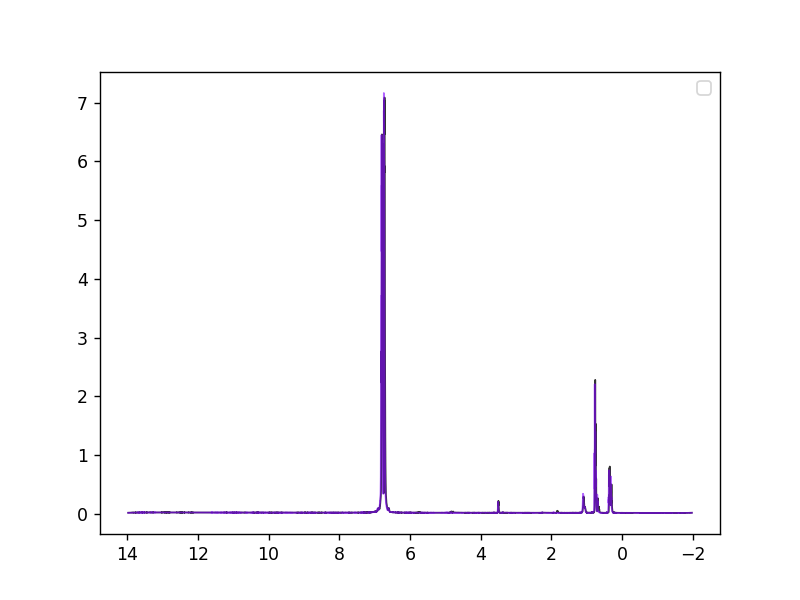

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [9]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp0, sp89], profile=True)

In [10]:
def cut_spectra_to_region(list_of_spectra, lower_bound, upper_bound):
    res = []
    for sp in list_of_spectra:
        ppm = np.array(sp.confs)[:,0]
        ints = np.array(sp.confs)[:,1]
        ppm_in_region = np.logical_and(ppm>lower_bound, ppm<upper_bound)
        new_ppm = ppm[ppm_in_region]
        new_ints = ints[ppm_in_region]
        res.append(NMRSpectrum(confs=list(zip(new_ppm, new_ints))))
    return res

In [11]:
preprocessed_spectra = [load_spectrum(data, i) for i in range(90)]
preprocessed_spectra = cut_spectra_to_region(preprocessed_spectra, 0, 8)

In [12]:
# plt.gca().invert_xaxis()
# NMRSpectrum.plot_all([preprocessed_spectra[0], preprocessed_spectra[89]], profile=True)

### Estimation

In [13]:
kappa = 0.1
kappa_th = 0.1

In [14]:
proportions_in_times = []
noise_proportions_in_times = []

# sp1 = preprocessed_spectra[0]
# sp1.trim_negative_intensities()
# sp1.normalize()

for i in range(1, 90):
    print('This is timepoint '+str(i)+'.\n')
    current = preprocessed_spectra[i]
    previous = preprocessed_spectra[i-1]
    estimation = estimate_proportions(current, [previous], what_to_compare='area',
                                      solver=pulp.GUROBI(msg=False),
                                     MTD=kappa, MTD_th=kappa_th)

    proportions_in_times.append(estimation['proportions'])
    noise_proportions_in_times.append(estimation['proportion_of_noise_in_components'])
    
    print('Proportions:\n')
    print(estimation['proportions'])
    print('\n')
    print('Proportion_of_noise_in_components:\n')
    print(estimation['proportion_of_noise_in_components'])
    print('\n')

This is timepoint 1.

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-13
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.


/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Proportions:

[0.9987191555349952]


Proportion_of_noise_in_components:

0.0017225268289999917


This is timepoint 2.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9996768539370025]


Proportion_of_noise_in_components:

0.0004353892610000011


This is timepoint 3.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9990401093159995]


Proportion_of_noise_in_components:

0.0007948028079999996


This is timepoint 4.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9986383901469978]


Proportion_of_noise_in_components:

0.0012663449879999973


This is timepoint 5.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9992414653879861]


Proportion_of_noise_in_components:

0.0009746112829999864


This is timepoint 6.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9996516743859931]


Proportions:

[0.9997691662529967]


Proportion_of_noise_in_components:

0.0007838862199999974


This is timepoint 45.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9995457804320007]


Proportion_of_noise_in_components:

0.0003456365940000002


This is timepoint 46.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9995553386040029]


Proportion_of_noise_in_components:

0.0003173214650000009


This is timepoint 47.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9996393044110007]


Proportion_of_noise_in_components:

0.00031477293100000024


This is timepoint 48.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9998562906659935]


Proportion_of_noise_in_components:

0.0006790095909999955


This is timepoint 49.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.999396954767

Proportions:

[0.9984132512779976]


Proportion_of_noise_in_components:

0.0014517162979999965


This is timepoint 88.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9988090816659961]


Proportion_of_noise_in_components:

0.0016374700559999937


This is timepoint 89.

The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Proportions:

[0.9996273475209948]


Proportion_of_noise_in_components:

0.0002056934179999989




In [15]:
len(proportions_in_times)

89

In [16]:
max([prop[0] for prop in proportions_in_times])

0.9998824039609929

In [17]:
min([prop[0] for prop in proportions_in_times])

0.9979032616540036

In [18]:
rel_proportions = [1]
for i, prop in enumerate(proportions_in_times):
    rel_proportions.append(rel_proportions[-1]*prop[0])

<IPython.core.display.Javascript object>


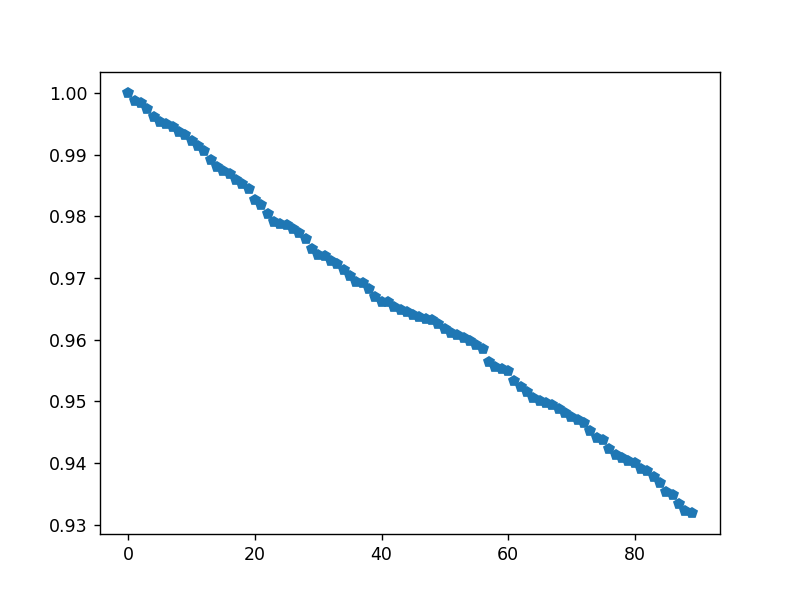

In [19]:
plt.plot(range(1+len(proportions_in_times)), rel_proportions, 'p')

In [20]:
prop = [prop[0] for prop in proportions_in_times]

In [21]:
with open('results/silan/comparing_with_previous/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(prop, f)

In [22]:
with open('results/silan/comparing_with_previous/unknown_substrats/noise_proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(noise_proportions_in_times, f)

### Linear regression

In [23]:
with open(r'results/silan/comparing_with_previous/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y).reshape(-1,1)

In [24]:
t = np.array(range(89))

In [25]:
t_and_ones = np.vstack([t, np.ones(len(t))]).T

In [26]:
slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]

/tmp/ipykernel_7903/1288480160.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


<IPython.core.display.Javascript object>


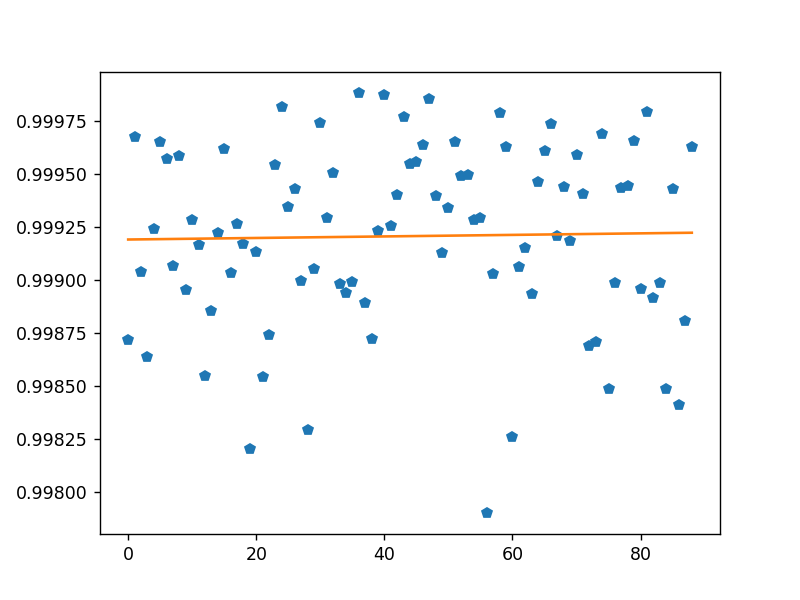

In [27]:
plt.plot(range(len(y)), [prop[0] for prop in y], 'p')
plt.plot(slope*t+intercept)
plt.show()